# Visulización general: Conteo de viajes en el servicio a lo largo del tiempo

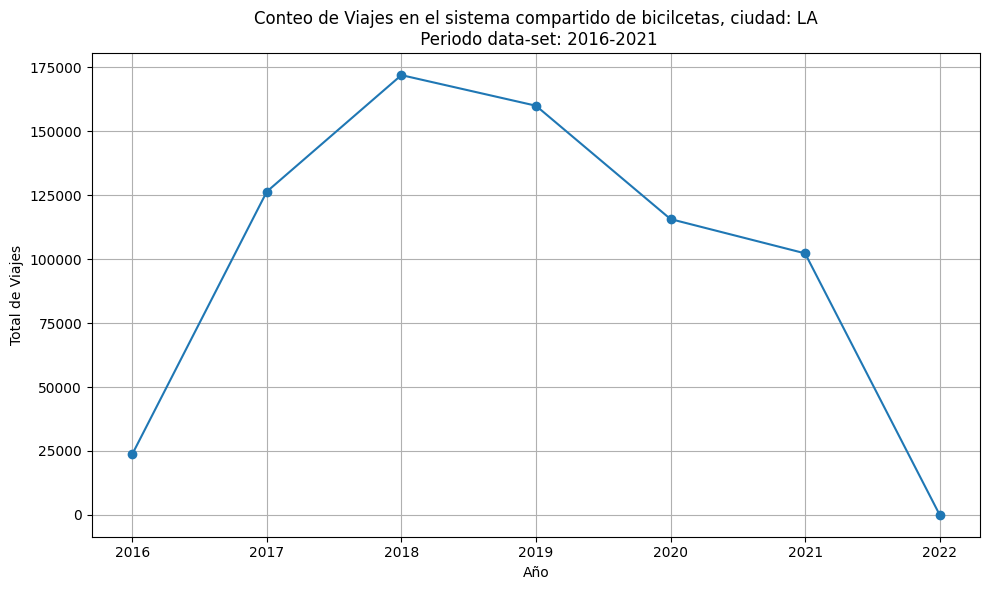

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Cargar el conjunto de datos
df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Asegurarse de que la columna 'start_date' esté en formato de fecha
df['start_date'] = pd.to_datetime(df['start_date'])

# Extraer el año de la columna 'start_date'
df['year'] = df['start_date'].dt.year

# Contar los viajes totales por año
total_trips_per_year = df.groupby('year').size().reset_index(name='total_trips')

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(total_trips_per_year['year'], total_trips_per_year['total_trips'], marker='o')
plt.title('Conteo de Viajes en el sistema compartido de bicilcetas, ciudad: LA\n Periodo data-set: 2016-2021')
plt.xlabel('Año')
plt.ylabel('Total de Viajes')
plt.xticks(total_trips_per_year['year'])  # Asegurarse de que se muestren todos los años
plt.grid()
plt.tight_layout()

# Crear la carpeta 'grafic' si no existe
if not os.path.exists('grafic'):
    os.makedirs('grafic')

# Guardar el gráfico en la carpeta 'grafic'
plt.savefig('grafic/conteo_viajes_por_año.png')

# Mostrar el gráfico
plt.show()

# Histograma general: DIstribución de viajes en relación al tiempo

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Manejar valores nulos
df = df.dropna()  # O usa fillna() según sea necesario

# Filtrar el DataFrame para que solo incluya duraciones de 0 a 60 minutos
df_filtered = df[(df['duration'] >= 0) & (df['duration'] <= 60)]

# Crear la carpeta para guardar gráficos
if not os.path.exists('grafic'):
    os.makedirs('grafic')

# Histograma de la duración de los viajes
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['duration'], bins=30, kde=True)
plt.title('Distribución de la Duración de los Viajes (0 a 60 minutos)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 60)  # Establecer límites del eje x
plt.tight_layout()
plt.savefig('grafic/distribucion_duracion_viajes.png')
plt.close()

# Histograma: Distribución de viajes en minutos por año 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Cargar el conjunto de datos
df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Verificar si las columnas existen
if 'duration' not in df.columns or 'start_time' not in df.columns:
    raise ValueError("Las columnas 'duration' o 'start_time' no se encuentran en el DataFrame.")

# Eliminar valores nulos en 'duration' y 'start_time'
df = df.dropna(subset=['duration', 'start_time'])

# Convertir 'start_time' a formato datetime, forzando errores a NaT
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')

# Verificar si hay valores NaT después de la conversión
if df['start_time'].isnull().any():
    print("Algunos valores en 'start_time' no son válidos y han sido convertidos a NaT.")

# Eliminar filas con NaT en 'start_time' después de la conversión
df = df.dropna(subset=['start_time'])

# Extraer el año de la fecha
df['year'] = df['start_time'].dt.year

# Filtrar el DataFrame para que solo incluya duraciones de 0 a 60 minutos
df_filtered = df[(df['duration'] >= 0) & (df['duration'] <= 60)]

# Crear la carpeta para guardar gráficos
if not os.path.exists('grafic'):
    os.makedirs('grafic')

# Generar histogramas por año
years = df_filtered['year'].unique()
for year in years:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtered[df_filtered['year'] == year]['duration'], bins=30, kde=True)
    plt.title(f'Distribución de la Duración de los Viajes en {year} (0 a 60 minutos)')
    plt.xlabel('Duración (minutos)')
    plt.ylabel('Frecuencia')
    plt.xlim(0, 60)  # Establecer límites del eje x
    plt.tight_layout()
    
    plt.savefig(f'grafic/distribucion_duracion_viajes_{year}.png')
    plt.close()

print("Histogramas generados exitosamente en la carpeta 'grafic'.")

Histogramas generados exitosamente en la carpeta 'grafic'.


# Top 10 rutas más utilizadas periodo 2016 - 2021: nombre de ruta, conteo de uso, duración media del viaje, frecuencia de uso por estación

In [5]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos
df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Agrupar los datos por estación de origen y destino
station_pairs = df.groupby(['start_station', 'end_station']).size().reset_index(name='count')
station_pairs = station_pairs.sort_values('count', ascending=False)

# Mostrar las 10 rutas más utilizadas
print('Rutas más utilizadas:')
print(station_pairs.head(10))

# Número total de viajes
total_trips = len(df)
print(f'Número total de viajes: {total_trips}')

# Duración media de los viajes
mean_duration = df['duration'].mean()
print(f'Duración media de los viajes: {mean_duration:.2f} minutos')

# Frecuencia de uso por estación
station_usage = df.groupby('start_station').size().reset_index(name='count')
station_usage = station_usage.sort_values('count', ascending=False)
print('Frecuencia de uso por estación:')
print(station_usage)

# Ordenar las estaciones por el número total de viajes
top_stations_by_trips = station_usage.sort_values('count', ascending=False)
print('Estaciones más concurridas por número de viajes:')
print(top_stations_by_trips.head(10))

# Ordenar las estaciones por la duración media de los viajes
station_durations = df.groupby('start_station')['duration'].mean().reset_index(name='mean_duration')
top_stations_by_duration = station_durations.sort_values('mean_duration', ascending=False)
print('Estaciones más concurridas por duración media de los viajes:')
print(top_stations_by_duration.head(10))

Rutas más utilizadas:
       start_station  end_station  count
8609            4214         4214   7930
2371            3030         3014   6126
8399            4210         4210   6075
946             3014         3030   5364
8610            4214         4215   4529
8678            4215         4215   3645
132             3005         3005   3173
8404            4210         4215   2950
12112           4345         4345   2525
2489            3031         3005   2384
Número total de viajes: 700000
Duración media de los viajes: 37.08 minutos
Frecuencia de uso por estación:
     start_station  count
1             3005  28490
22            3030  20280
9             3014  18739
122           4214  17466
23            3031  17069
..             ...    ...
208           4395      5
191           4369      5
193           4373      3
80            4143      1
161           4327      1

[364 rows x 2 columns]
Estaciones más concurridas por número de viajes:
     start_station  count
1        

# Rutas más utilizados por año: conteo de viajes, duración media, frecuencia de uso por estación y año, estaciones mas concurridas 

In [6]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos
df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Convertir 'start_time' a formato datetime
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')

# Eliminar filas con NaT en 'start_time'
df = df.dropna(subset=['start_time'])

# Extraer el año de la fecha
df['year'] = df['start_time'].dt.year

# Verificar los años únicos disponibles
print(f'Años disponibles en el conjunto de datos: {df["year"].unique()}')

# Función para analizar los datos por año
def analyze_by_year(year):
    yearly_data = df[df['year'] == year]

    # Agrupar los datos por estación de origen y destino
    station_pairs = yearly_data.groupby(['start_station', 'end_station']).size().reset_index(name='count')
    station_pairs = station_pairs.sort_values('count', ascending=False)

    # Mostrar las 10 rutas más utilizadas
    print(f'\nRutas más utilizadas en {year}:')
    print(station_pairs.head(10))

    # Número total de viajes
    total_trips = len(yearly_data)
    print(f'Número total de viajes en {year}: {total_trips}')

    # Duración media de los viajes
    mean_duration = yearly_data['duration'].mean()
    print(f'Duración media de los viajes en {year}: {mean_duration:.2f} minutos')

    # Frecuencia de uso por estación
    station_usage = yearly_data.groupby('start_station').size().reset_index(name='count')
    station_usage = station_usage.sort_values('count', ascending=False)
    print(f'Frecuencia de uso por estación en {year}:')
    print(station_usage)

    # Ordenar las estaciones por el número total de viajes
    top_stations_by_trips = station_usage.sort_values('count', ascending=False)
    print(f'Estaciones más concurridas por número de viajes en {year}:')
    print(top_stations_by_trips.head(10))

    # Ordenar las estaciones por la duración media de los viajes
    station_durations = yearly_data.groupby('start_station')['duration'].mean().reset_index(name='mean_duration')
    top_stations_by_duration = station_durations.sort_values('mean_duration', ascending=False)
    print(f'Estaciones más concurridas por duración media de los viajes en {year}:')
    print(top_stations_by_duration.head(10))

# Analizar los datos por cada año disponible
for year in df['year'].unique():
    analyze_by_year(year)

Años disponibles en el conjunto de datos: [2018 2017 2019 2020 2021 2016 2022]

Rutas más utilizadas en 2018:
      start_station  end_station  count
4986           4214         4214   4168
4911           4210         4210   2850
4987           4214         4215   2594
4916           4210         4215   1674
5010           4215         4215   1589
1290           3030         3014   1549
511            3014         3030   1498
4982           4214         4210   1143
4915           4210         4214   1067
3766           4126         4126    867
Número total de viajes en 2018: 171929
Duración media de los viajes en 2018: 41.40 minutos
Frecuencia de uso por estación en 2018:
     start_station  count
115           4214   9132
1             3005   6836
111           4210   6418
21            3030   5326
8             3014   5032
..             ...    ...
7             3013     45
127           4266     37
62            4125     33
61            4108     30
130           4275     12

[132 r

# Top 4: Horarios de mayor saturación para las 10 rutas más usadas 

In [8]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Agrupar los datos por estación de origen y destino, y contar los viajes
station_pairs = df.groupby(['start_station', 'end_station']).size().reset_index(name='count')
top_routes = station_pairs.sort_values('count', ascending=False).head(10)

# Mostrar las 10 rutas más utilizadas
print('Top 10 rutas más utilizadas:')
print(top_routes)

# Para cada ruta, calcular los horarios más saturados
for idx, route in top_routes.iterrows():
    start_station = route['start_station']
    end_station = route['end_station']
    
    # Filtrar los datos para la ruta actual
    filtered_data = df[(df['start_station'] == start_station) & (df['end_station'] == end_station)]
    
    # Extraer la hora de inicio y contar los viajes
    filtered_data['hour'] = pd.to_datetime(filtered_data['start_time']).dt.hour
    hourly_counts = filtered_data.groupby(['start_station', 'end_station', 'hour', 'passholder_type']).size().reset_index(name='count')
    
    # Obtener el top 10 de horarios más saturados
    top_hours = hourly_counts.sort_values('count', ascending=False).head(4)
    
    # Mostrar resultados
    print(f'\nTop 4 horarios más saturados para la ruta iniciando en: {start_station} ->  concluyendo en: {end_station}:')
    print(top_hours)

Top 10 rutas más utilizadas:
       start_station  end_station  count
8609            4214         4214   7930
2371            3030         3014   6126
8399            4210         4210   6075
946             3014         3030   5364
8610            4214         4215   4529
8678            4215         4215   3645
132             3005         3005   3173
8404            4210         4215   2950
12112           4345         4345   2525
2489            3031         3005   2384

Top 4 horarios más saturados para la ruta iniciando en: 4214 ->  concluyendo en: 4214:
    start_station  end_station  hour passholder_type  count
4            4214         4214     0         Walk-up    769
70           4214         4214    22         Walk-up    752
66           4214         4214    21         Walk-up    727
75           4214         4214    23         Walk-up    686

Top 4 horarios más saturados para la ruta iniciando en: 3030 ->  concluyendo en: 3014:
    start_station  end_station  hour passhol

C:\Users\jacob\AppData\Local\Temp\ipykernel_16676\3950584798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = pd.to_datetime(filtered_data['start_time']).dt.hour
C:\Users\jacob\AppData\Local\Temp\ipykernel_16676\3950584798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = pd.to_datetime(filtered_data['start_time']).dt.hour
C:\Users\jacob\AppData\Local\Temp\ipykernel_16676\3950584798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy o


Top 4 horarios más saturados para la ruta iniciando en: 4215 ->  concluyendo en: 4215:
    start_station  end_station  hour passholder_type  count
4            4215         4215     0         Walk-up    281
79           4215         4215    22         Walk-up    245
8            4215         4215     1         Walk-up    242
83           4215         4215    23         Walk-up    240

Top 4 horarios más saturados para la ruta iniciando en: 3005 ->  concluyendo en: 3005:
    start_station  end_station  hour passholder_type  count
14           3005         3005     3    Monthly Pass    210
10           3005         3005     2    Monthly Pass    206
19           3005         3005     4    Monthly Pass    181
5            3005         3005     1    Monthly Pass    176

Top 4 horarios más saturados para la ruta iniciando en: 4210 ->  concluyendo en: 4215:
    start_station  end_station  hour passholder_type  count
55           4210         4215    22         Walk-up    314
59           421

C:\Users\jacob\AppData\Local\Temp\ipykernel_16676\3950584798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = pd.to_datetime(filtered_data['start_time']).dt.hour
C:\Users\jacob\AppData\Local\Temp\ipykernel_16676\3950584798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = pd.to_datetime(filtered_data['start_time']).dt.hour
C:\Users\jacob\AppData\Local\Temp\ipykernel_16676\3950584798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy o

# Modelo analitico usando Regresión Lineal (LR)

Error Cuadrático Medio: 12594037.334361805
Predicción de viajes para 2022-01: 8741.309664435219
Predicción de viajes para 2022-03: 8674.066208746983
Predicción de viajes para 2022-04: 8606.822753058746
Predicción de viajes para 2022-04: 8539.57929737051
Predicción de viajes para 2022-06: 8472.335841682041
Predicción de viajes para 2022-07: 8405.092385993805
Predicción de viajes para 2022-07: 8337.848930305801
Predicción de viajes para 2022-09: 8270.605474617332
Predicción de viajes para 2022-10: 8203.362018929096
Predicción de viajes para 2022-10: 8136.11856324086
Predicción de viajes para 2022-12: 8068.875107552623
Predicción de viajes para 2023-01: 8001.631651864387
Predicción de viajes para 2023-01: 7934.388196176151
Predicción de viajes para 2023-03: 7867.144740487682
Predicción de viajes para 2023-04: 7799.901284799445
Predicción de viajes para 2023-04: 7732.657829111209
Predicción de viajes para 2023-06: 7665.414373422973
Predicción de viajes para 2023-07: 7598.170917734737
Predi

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


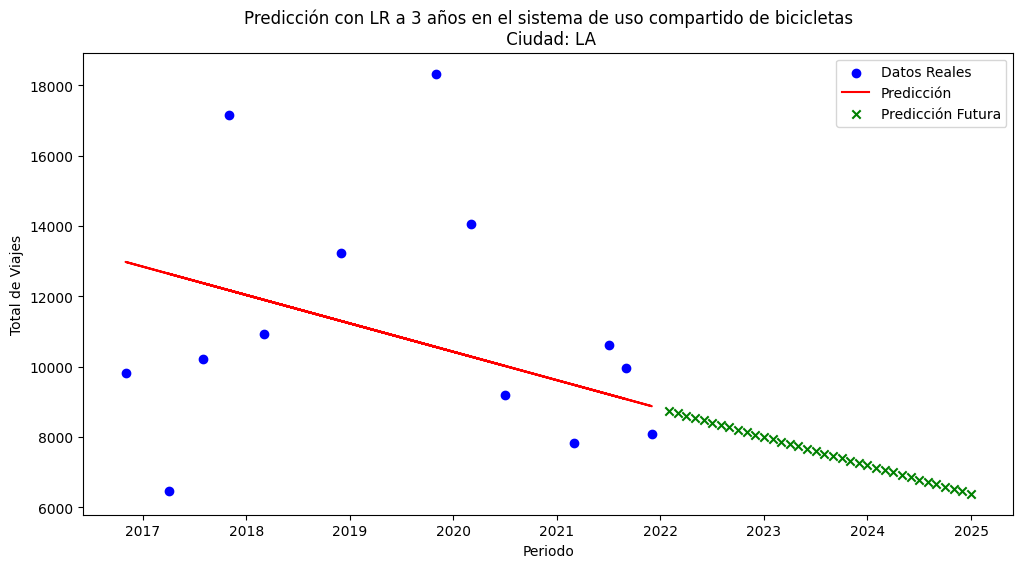

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preparar los datos
df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Convertir start_date y start_hour a datetime
df['start_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['start_hour'])

# Extraer características adicionales
df['year'] = df['start_datetime'].dt.year
df['month'] = df['start_datetime'].dt.month
df['day'] = df['start_datetime'].dt.day
df['day_of_week'] = df['start_datetime'].dt.dayofweek  # Lunes=0, Domingo=6
df['hour'] = df['start_datetime'].dt.hour

# Agrupar por año y mes
total_trips_per_month = df.groupby(['year', 'month']).size().reset_index(name='total_trips')

# Crear una columna de tiempo en formato numérico para el modelo
total_trips_per_month['time'] = total_trips_per_month['year'] + total_trips_per_month['month'] / 12

# Dividir los datos
X = total_trips_per_month[['time']]  # Característica
y = total_trips_per_month['total_trips']  # Objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

# Predicciones a 2 años en el futuro
future_years_months = []
for year in range(total_trips_per_month['year'].max(), total_trips_per_month['year'].max() + 3):
    for month in range(1, 13):  # De enero a diciembre
        future_years_months.append(year + month / 12)

future_predictions = model.predict(np.array(future_years_months).reshape(-1, 1))

# Mostrar resultados futuros
for year_month, prediction in zip(future_years_months, future_predictions):
    year = int(year_month)
    month = int((year_month - year) * 12) + 1
    print(f'Predicción de viajes para {year}-{month:02d}: {prediction}')

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.scatter(future_years_months, future_predictions, color='green', label='Predicción Futura', marker='x')
plt.title('Predicción con LR a 3 años en el sistema de uso compartido de bicicletas\n Ciudad: LA')
plt.xlabel('Periodo')
plt.ylabel('Total de Viajes')
plt.legend()
plt.savefig('grafic/Modelo_analitico_(LR).png')
plt.show()

# Método Anlítico Prophet, Visualización de viajes en train_set , tendencias anuales, por mes, semana y dias, predicción final a 3 años. 1095 dias

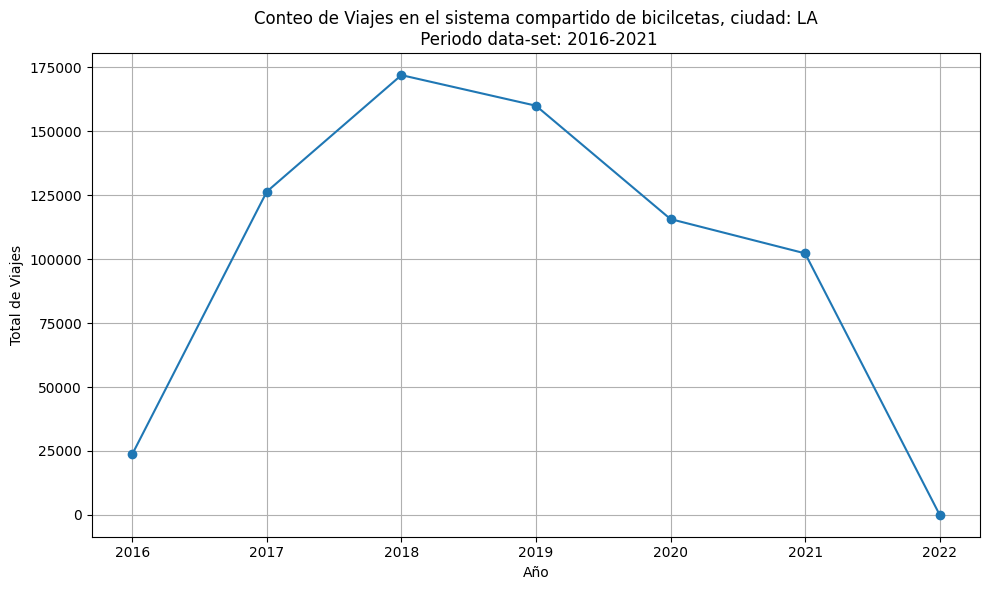

10:27:44 - cmdstanpy - INFO - Chain [1] start processing
10:27:44 - cmdstanpy - INFO - Chain [1] done processing


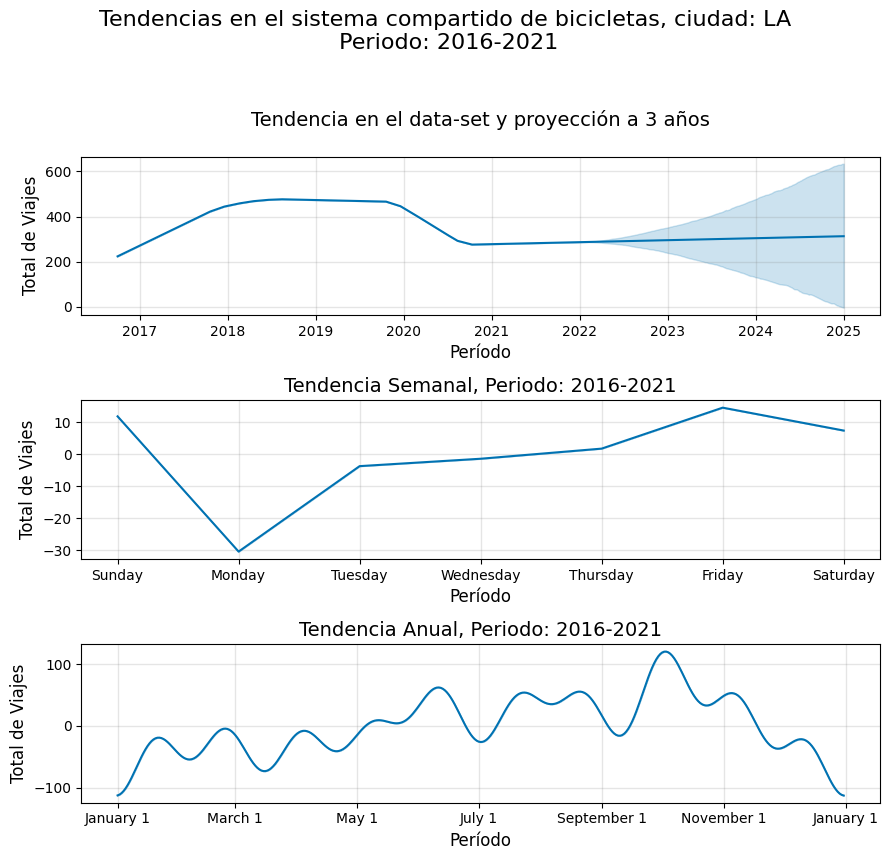

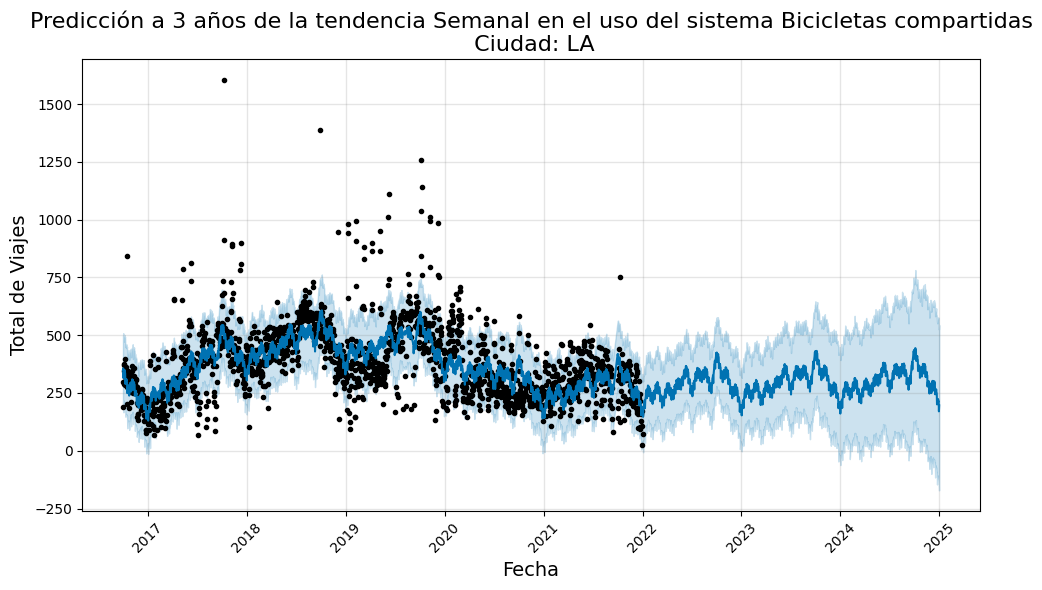

C:\Users\jacob\AppData\Local\Temp\ipykernel_4252\501575055.py:83: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_forecast = forecast.resample('Y', on='ds').sum()  # Resumir pronóstico por año


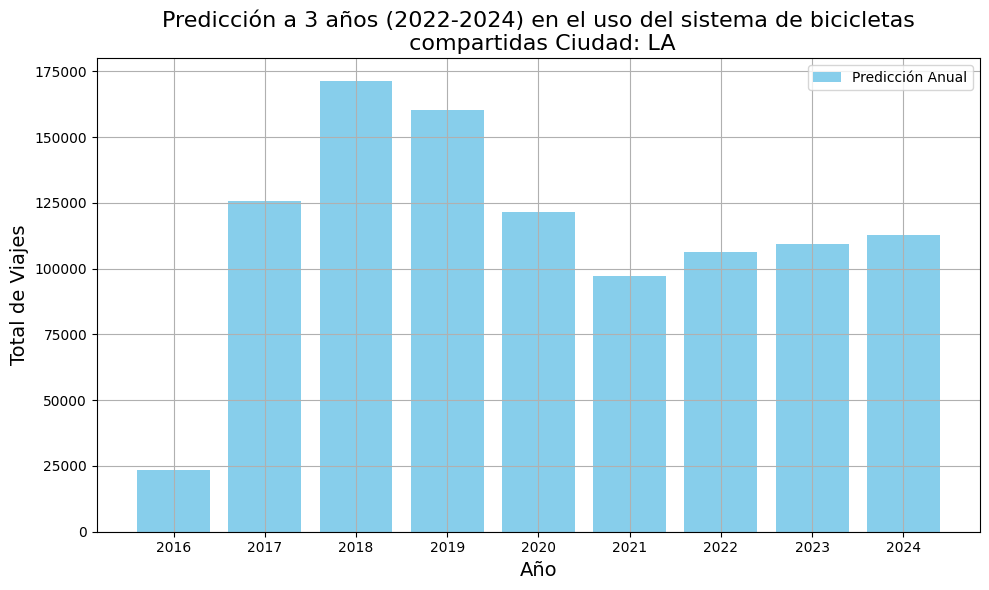

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from prophet import Prophet

# Cargar el conjunto de datos
df = pd.read_csv(r"C:\Users\jacob\OneDrive\Escritorio\Python\Tecnical_TEXT_04.02.35\Solución_prueba_tecnica_100225_V1.5.0_JT\data_prosseced\test_set_Preproceced_090225_V1.0.0_JT.csv", low_memory=False)

# Asegurarse de que la columna 'start_date' esté en formato de fecha
df['start_date'] = pd.to_datetime(df['start_date'])

# Extraer el año, mes y día de la columna 'start_date'
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['day_of_week'] = df['start_date'].dt.day_name()

#   Contar los viajes totales por año
total_trips_per_year = df.groupby('year').size().reset_index(name='total_trips')

#Crear el gráfico de líneas para viajes por año
plt.figure(figsize=(10, 6))
plt.plot(total_trips_per_year['year'], total_trips_per_year['total_trips'], marker='o')
plt.title('Conteo de Viajes en el sistema compartido de bicilcetas, ciudad: LA\n Periodo data-set: 2016-2021')
plt.xlabel('Año')
plt.ylabel('Total de Viajes')
plt.xticks(total_trips_per_year['year'])  # Asegurarse de que se muestren todos los años
plt.grid()
plt.tight_layout()
"""
# Crear la carpeta 'grafic' si no existe
if not os.path.exists('grafic'):
    os.makedirs('grafic')

# Guardar el gráfico en la carpeta 'grafic'
plt.savefig('grafic/conteo_viajes_por_año.png')
"""
plt.show()

# Agrupar por fecha y contar total de viajes
total_trips_per_day = df.groupby('start_date').size().reset_index(name='total_trips')

#renombrar columnas para Prophet
total_trips_per_day.columns = ['ds', 'y']

#Modelo Prophet con estacionalidad semanal y anual
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.fit(total_trips_per_day)

# Crear un DataFrame para las predicciones futuras (1095 días = 3 años)
future = model.make_future_dataframe(periods=1095)  # Predicción de 3 añotes
forecast = model.predict(future)
fig = model.plot_components(forecast)

# Personalización de los gráficos de componentes
for ax in fig.axes:
    ax.set_xlabel('Período', fontsize=12)  # Etiqueta común para el eje X
    ax.set_ylabel('Total de Viajes', fontsize=12)  # Etiqueta común para el eje Y
    ax.grid(True)  # cuadrícula para mejor legibilidad

# títulos específicos para cada componente
fig.axes[0].set_title('Tendencia en el data-set y proyección a 3 años\n', fontsize=14)
fig.axes[1].set_title('Tendencia Semanal, Periodo: 2016-2021', fontsize=14)
fig.axes[2].set_title('Tendencia Anual, Periodo: 2016-2021', fontsize=14)

plt.suptitle('Tendencias en el sistema compartido de bicicletas, ciudad: LA\n Periodo: 2016-2021', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el layout
plt.savefig('grafic/Modelo_analitcico_Prophet_Tendencias.png')
plt.show()

# Visualización de los resultados semanales
fig2 = model.plot(forecast)
plt.title('Predicción a 3 años de la tendencia Semanal en el uso del sistema Bicicletas compartidas\n Ciudad: LA', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Total de Viajes', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta automáticamente la disposición
plt.savefig('grafic/Modelo_analitcico_Prophet_Tendencias_actuales.png')
plt.show()


# Gráfico adicional para la proyección anual
annual_forecast = forecast.resample('Y', on='ds').sum()  # Resumir pronóstico por año
plt.figure(figsize=(10, 6))
plt.bar(annual_forecast.index.year, annual_forecast['yhat'], color='skyblue', label='Predicción Anual')
plt.title('Predicción a 3 años (2022-2024) en el uso del sistema de bicicletas\n compartidas Ciudad: LA', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total de Viajes', fontsize=14)
plt.xticks(annual_forecast.index.year)  # Asegurarse de que se muestren todos los años
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig('grafic/Modelo_analitcico_Prophet_predicción_3años.png')
plt.show()